# Project Report IV: Finally, Some Data Analysis!
___
**Brief:**<br>
In this report, I'll be taking on the unsupervised and then supervised learning tasks for my project.

**Sections:**<br>
1. [Failed Unsupervised Learning: A Prologue](#1)
2. [Data Exploration](#2)
3. [Supervised Learning](#2)
___
<a id='1'>

## Failed Unsupervised Learning: A Prologue
<a id='1a'>

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import nltk
from nltk.corpus import PlaintextCorpusReader as cr
import pandas as pd
import numpy as np
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import pickle
file = open('email_df', 'rb')
email_df = pickle.load(file)
file.close()

In [3]:
small_df = email_df.sample(20000)
small_df[:5]

,Date,From,To,Subject,Cc,Bcc,X-From,X-To,X-cc,X-bcc,X-Folder,X-FileName,Text,Folder,User
108999,"Wed, 13 Sep 2000 07:53:00 -0700 (PDT)",daren.farmer@enron.com,julie.meyers@enron.com,contract expirations,1.0,Julie Meyers,,,\Darren_Farmer_Dec2000\Notes Folders\'sent mail,Farmer-D,dfarmer.nsf,None,"Julie, \n\nIn Sitara, the following purchases ...",_sent_mail,farmer-d
104460,"Tue, 11 Apr 2000 02:33:00 -0700 (PDT)",jackie.young@enron.com,robert.lloyd@enron.com,FYI - Gas flow,"pat.clynes@enron.com, daren.farmer@enron.com, ...","pat.clynes@enron.com, daren.farmer@enron.com, ...",Jackie Young,Robert E Lloyd,"Pat Clynes, Daren J Farmer, Gary W Lamphier",,\Darren_Farmer_Dec2000\Notes Folders\Discussio...,dfarmer.nsf,---------------------- Forwarded by Jackie You...,discussion_threads,farmer-d
196164,"Wed, 20 Dec 2000 18:02:00 -0800 (PST)",enron.announcements@enron.com,all.america@enron.com,December 22 - SRRS Decommissioning Notification,1.0,All Enron Corp North America,,,\Vincent_Kaminski_Jun2001_1\Notes Folders\All ...,Kaminski-V,vkamins.nsf,None,SRRS Decommissioning Notification\n\nWe are on...,all_documents,kaminski-v
11633,"Thu, 2 Nov 2000 08:25:00 -0800 (PST)",jason.bass2@compaq.com,Caution ... bad language,1.0,text/plain; charset=us-ascii,,,\Eric_Bass_Dec2000\Notes Folders\All documents,Bass-E,ebass.nsf,None,None,- dab.exe,all_documents,bass-e
128703,"Mon, 22 May 2000 04:39:00 -0700 (PDT)",chris.germany@enron.com,john.singer@enron.com,Local Prod,1.0,John M Singer,,,\Chris_Germany_Dec2000\Notes Folders\Sent,Germany-C,cgerman.nsf,None,"Just got word from EES, they can take the EOG ...",sent,germany-c


*Note*: So at this point, there is just too much data. Going to use "small_df" the rest of the way.<br>
*Python Note*: We need .sample() here! I did this whole thing without it and it was just two users...

In [4]:
#vectorizer = TfidfVectorizer(stop_words="english")
#text_tfidf = vectorizer.fit_transform(text)
#text_tfidf

In [5]:
#from sklearn.cluster import KMeans
#k_model = KMeans(n_clusters=3)
#k_model.fit(text_tfidf)
#k_model.predict(text_tfidf)
#labels = k_model.labels_

In [6]:
#import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
#plot = plt.figure()
#ax = Axes3D(plot, rect=[0, 0, 0.95, 1], elev=48, azim=134)
#ax.scatter(text[:, 3], text[:, 0], text[:, 2],
#          c=labels.astype(np.float), edgecolor="k", s=50)
#ax.set_xlabel("x")
#ax.set_ylabel("y")
#ax.set_zlabel("z")
#plt.title("K Means", fontsize=14)

*Summary*: So, ultimately this has been a very confusing experience for me. I tried to take on unsupervised learning, but I'm really finding myself learning much more on tutorials than I'd like to. Instead, let's take a step back and look other parts of the data, then revisit this.
<a id='2'>

## Data Exploration

***DateTime and Chronology***<br>
Much of what follows is inspired by a fantastic resource I found on Kaggle (https://www.kaggle.com/dfoly1/k-means-clustering-from-scratch). I'll be using it to help organize my DF better (the _to_datetime_ thing and much of the unsupervised learning).

My first goal is to get a sense of when these emails were sent, so we'll be using the DateTime library!

In [7]:
small_df['Date'] = pd.to_datetime(small_df['Date'], infer_datetime_format=True)

In [8]:
months = []
days = []
years = []
for date in small_df['Date']:
    months.append(date.month)
    days.append(date.day)
    years.append(date.year)
small_df["Month"] = months
small_df["Day"] = days
small_df["Year"] = years
small_df[:5]

,Date,From,To,Subject,Cc,Bcc,X-From,X-To,X-cc,X-bcc,X-Folder,X-FileName,Text,Folder,User,Month,Day,Year
108999,2000-09-13 07:53:00-07:00,daren.farmer@enron.com,julie.meyers@enron.com,contract expirations,1.0,Julie Meyers,,,\Darren_Farmer_Dec2000\Notes Folders\'sent mail,Farmer-D,dfarmer.nsf,None,"Julie, \n\nIn Sitara, the following purchases ...",_sent_mail,farmer-d,9,13,2000
104460,2000-04-11 02:33:00-07:00,jackie.young@enron.com,robert.lloyd@enron.com,FYI - Gas flow,"pat.clynes@enron.com, daren.farmer@enron.com, ...","pat.clynes@enron.com, daren.farmer@enron.com, ...",Jackie Young,Robert E Lloyd,"Pat Clynes, Daren J Farmer, Gary W Lamphier",,\Darren_Farmer_Dec2000\Notes Folders\Discussio...,dfarmer.nsf,---------------------- Forwarded by Jackie You...,discussion_threads,farmer-d,4,11,2000
196164,2000-12-20 18:02:00-08:00,enron.announcements@enron.com,all.america@enron.com,December 22 - SRRS Decommissioning Notification,1.0,All Enron Corp North America,,,\Vincent_Kaminski_Jun2001_1\Notes Folders\All ...,Kaminski-V,vkamins.nsf,None,SRRS Decommissioning Notification\n\nWe are on...,all_documents,kaminski-v,12,20,2000
11633,2000-11-02 08:25:00-08:00,jason.bass2@compaq.com,Caution ... bad language,1.0,text/plain; charset=us-ascii,,,\Eric_Bass_Dec2000\Notes Folders\All documents,Bass-E,ebass.nsf,None,None,- dab.exe,all_documents,bass-e,11,2,2000
128703,2000-05-22 04:39:00-07:00,chris.germany@enron.com,john.singer@enron.com,Local Prod,1.0,John M Singer,,,\Chris_Germany_Dec2000\Notes Folders\Sent,Germany-C,cgerman.nsf,None,"Just got word from EES, they can take the EOG ...",sent,germany-c,5,22,2000


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

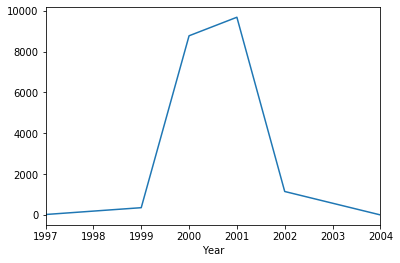

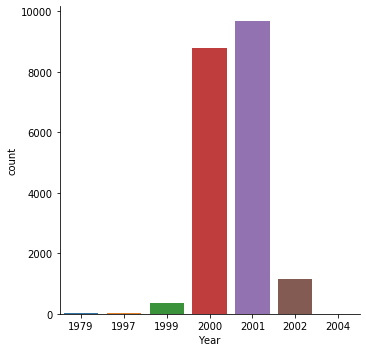

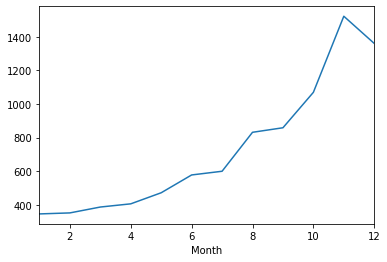

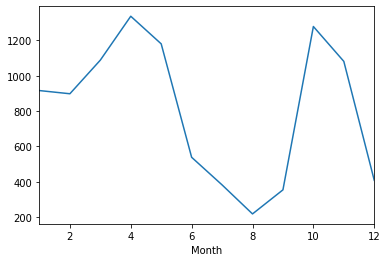

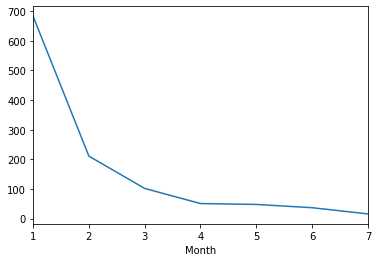

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
x_ax = (small_df["Year"] >= 1995) & (small_df["Year"] <= 2005)
plt.figure()
graphYears = small_df.loc[x_ax].groupby("Year")["Text"].count().plot()

barYears = sns.catplot(x='Year',data=small_df,kind='count')

x_ax = (small_df["Year"] == 2000)
plt.figure()
graph2000 = small_df.loc[x_ax].groupby("Month")["Text"].count().plot()

x_ax = (small_df["Year"] == 2001)
plt.figure()
graph2001 = small_df.loc[x_ax].groupby("Month")["Text"].count().plot()

x_ax = (small_df["Year"] == 2002)
plt.figure()
graph2002 = small_df.loc[x_ax].groupby("Month")["Text"].count().plot()

<Figure size 432x288 with 0 Axes>

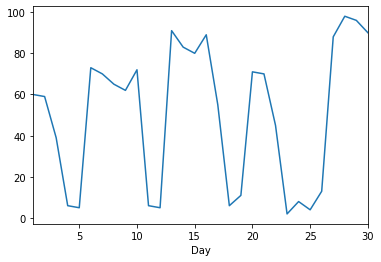

In [131]:
x_ax = (small_df["Year"] == 2000) & (small_df["Month"] == 11)
plt.figure()
graph_911 = small_df.loc[x_ax].groupby("Day")["Text"].count().plot()

*Note*: Because this is only a sample of 20,000, the data gets small on a month-to-month basis. However, this corpus could also give us insights on how people reacted to major world events. I'd assume absolutely nobody was emailing on 9/11, but it would be interesting to see what the existing emails say.

**Summary**: As we can see here, our 20,000 emails are only distributed over four years, peaking over 2000 and 2001. This checks out with what we know about the Enron Scandal. I'd be interested to see if the years get wider over a larger sample?
<a id='1b'>

***A Census of The Users***

In [57]:
setTo = small_df["To"].nunique()
setFrom = small_df["From"].nunique()
print("percentage of emails to unique people:", (setTo/totalSet)*100)
print("percentage of emails from unique people:", (setFrom/totalSet)*100)

percentage of emails to unique people: 42.175000000000004
percentage of emails from unique people: 19.39


*Note*: Very round, whole numbers. Satisfying.

In [70]:
toUsers = (((small_df.groupby("User")["To"].nunique())/small_df.groupby("User")["To"].count())*100)
fromUsers = ((small_df.groupby("User")["From"].nunique())/small_df.groupby("User")["From"].count())*100

In [71]:
toUsers.keys()
toUsers

Index(['allen-p', 'arnold-j', 'arora-h', 'badeer-r', 'bailey-s', 'bass-e',
       'baughman-d', 'beck-s', 'benson-r', 'blair-l', 'brawner-s', 'buy-r',
       'campbell-l', 'carson-m', 'cash-m', 'causholli-m', 'corman-s',
       'crandell-s', 'cuilla-m', 'dasovich-j', 'davis-d', 'dean-c',
       'delainey-d', 'derrick-j', 'dickson-s', 'donoho-l', 'donohoe-t',
       'dorland-c', 'ermis-f', 'farmer-d', 'fischer-m', 'forney-j', 'fossum-d',
       'gang-l', 'gay-r', 'geaccone-t', 'germany-c', 'gilbertsmith-d',
       'giron-d', 'griffith-j', 'grigsby-m', 'guzman-m', 'haedicke-m',
       'hain-m', 'harris-s', 'hayslett-r', 'heard-m', 'hendrickson-s',
       'hernandez-j', 'hodge-j', 'holst-k', 'horton-s', 'hyatt-k', 'hyvl-d',
       'jones-t', 'kaminski-v', 'kean-s', 'keavey-p', 'keiser-k', 'king-j',
       'kitchen-l', 'kuykendall-t', 'lavorato-j', 'lay-k', 'lenhart-m',
       'lewis-a', 'linder-e', 'lokay-m', 'lokey-t', 'love-p', 'lucci-p'],
      dtype='object', name='User')

User
allen-p     50.643777
arnold-j    40.281690
arora-h     58.139535
badeer-r    70.769231
bailey-s    71.875000
              ...    
linder-e    10.169492
lokay-m     54.975124
lokey-t     65.555556
love-p      52.533333
lucci-p     37.209302
Name: To, Length: 71, dtype: float64

<Figure size 1800x720 with 0 Axes>

<Figure size 1800x720 with 0 Axes>

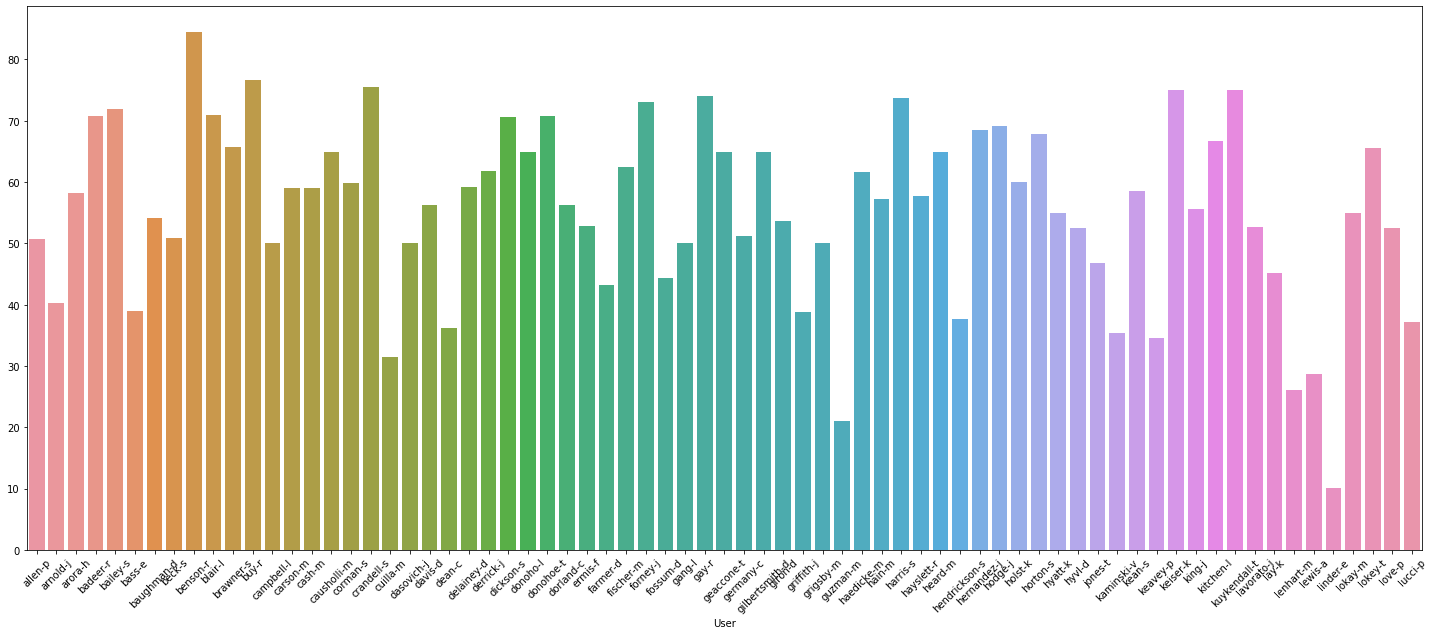

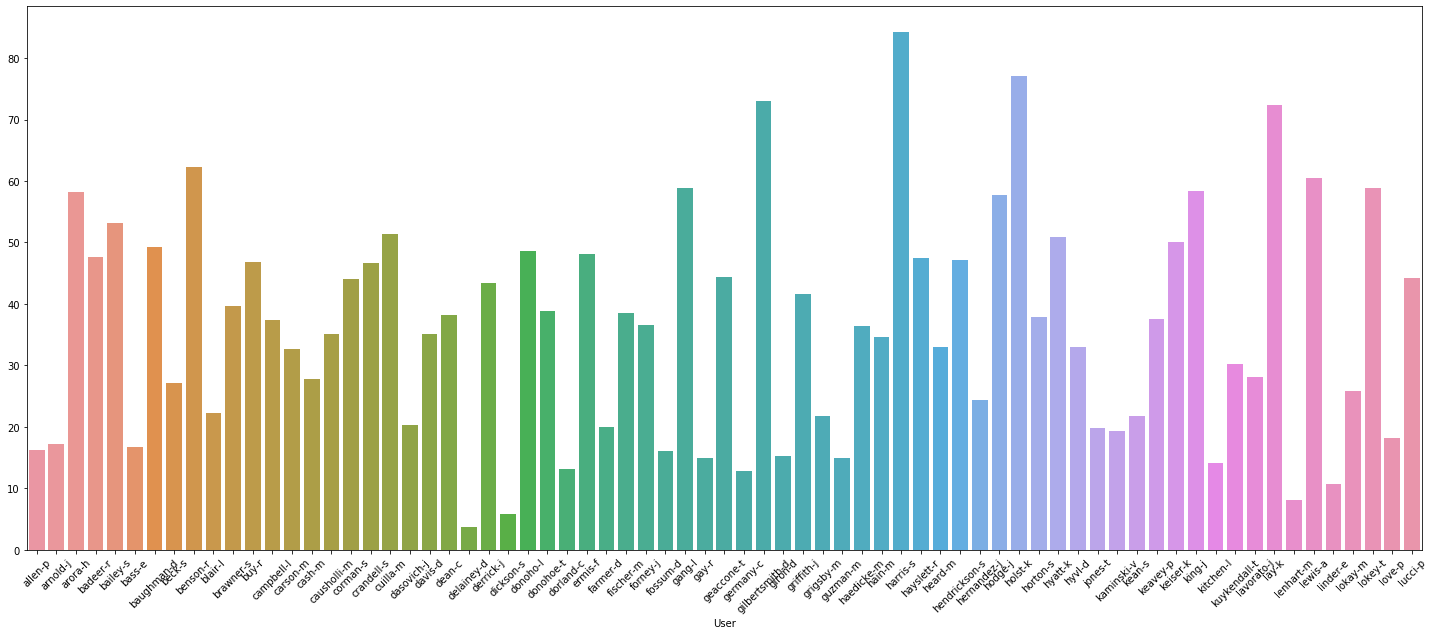

In [72]:
plt.figure(figsize=(25,10))
barUniqueSends = sns.barplot(x=toUsers.index, y=toUsers.values)
barUniqueSends = barUniqueSends.set_xticklabels(barUniqueSends.get_xticklabels(), rotation=45)

plt.figure(figsize=(25,10))
barUniqueRecs = sns.barplot(x=fromUsers.index, y=fromUsers.values)
barUniqueRecs = barUniqueRecs.set_xticklabels(barUniqueRecs.get_xticklabels(), rotation=45)

In [123]:
linder = small_df[small_df["User"] == 'linder-e']
linder

,Date,From,To,Subject,Cc,Bcc,X-From,X-To,X-cc,X-bcc,X-Folder,X-FileName,Text,Folder,User,Month,Day,Year
262568,2001-04-26 11:08:00-07:00,virginia.thompson@enron.com,portland.shift@enron.com,Montana Power,1.0,Portland Shift,,,\eric linder 6-28-02\Notes Folders\All documents,LINDER-E,eric linder 6-28-02.nsf,None,"Dear Traders,\n\nI still have not heard respon...",all_documents,linder-e,4,26,2001
263254,2001-04-19 04:45:00-07:00,pete.davis@enron.com,pete.davis@enron.com,Start Date: 4/19/01; HourAhead hour: 12; <COD...,"bert.meyers@enron.com, bill.williams.iii@enron...","bert.meyers@enron.com, bill.williams.iii@enron...",Schedule Crawler<pete.davis@enron.com>,pete.davis@enron.com,"bert.meyers@enron.com, bill.williams.III@enron...",,\eric linder 6-28-02\Notes Folders\Discussion ...,eric linder 6-28-02.nsf,Start Date: 4/19/01; HourAhead hour: 12; No a...,discussion_threads,linder-e,4,19,2001
264409,2001-04-03 06:41:00-07:00,pete.davis@enron.com,pete.davis@enron.com,Start Date: 4/3/01; HourAhead hour: 14; <CODE...,"bert.meyers@enron.com, bill.williams.iii@enron...","bert.meyers@enron.com, bill.williams.iii@enron...",Schedule Crawler<pete.davis@enron.com>,pete.davis@enron.com,"bert.meyers@enron.com, bill.williams.III@enron...",,\eric linder 6-28-02\Notes Folders\Notes inbox,eric linder 6-28-02.nsf,Start Date: 4/3/01; HourAhead hour: 14; No an...,notes_inbox,linder-e,4,3,2001
264172,2001-04-11 00:41:00-07:00,pete.davis@enron.com,pete.davis@enron.com,Start Date: 4/11/01; HourAhead hour: 8; <CODE...,"bert.meyers@enron.com, bill.williams.iii@enron...","bert.meyers@enron.com, bill.williams.iii@enron...",Schedule Crawler<pete.davis@enron.com>,pete.davis@enron.com,"bert.meyers@enron.com, bill.williams.III@enron...",,\eric linder 6-28-02\Notes Folders\Notes inbox,eric linder 6-28-02.nsf,Start Date: 4/11/01; HourAhead hour: 8; No an...,notes_inbox,linder-e,4,11,2001
264133,2001-04-11 11:41:00-07:00,pete.davis@enron.com,pete.davis@enron.com,Start Date: 4/11/01; HourAhead hour: 19; <COD...,"bert.meyers@enron.com, bill.williams.iii@enron...","bert.meyers@enron.com, bill.williams.iii@enron...",Schedule Crawler<pete.davis@enron.com>,pete.davis@enron.com,"bert.meyers@enron.com, bill.williams.III@enron...",,\eric linder 6-28-02\Notes Folders\Notes inbox,eric linder 6-28-02.nsf,Start Date: 4/11/01; HourAhead hour: 19; No a...,notes_inbox,linder-e,4,11,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263034,2001-04-12 01:40:00-07:00,pete.davis@enron.com,pete.davis@enron.com,Start Date: 4/12/01; HourAhead hour: 9; <CODE...,"bert.meyers@enron.com, bill.williams.iii@enron...","bert.meyers@enron.com, bill.williams.iii@enron...",Schedule Crawler<pete.davis@enron.com>,pete.davis@enron.com,"bert.meyers@enron.com, bill.williams.III@enron...",,\eric linder 6-28-02\Notes Folders\Discussion ...,eric linder 6-28-02.nsf,Start Date: 4/12/01; HourAhead hour: 9; No an...,discussion_threads,linder-e,4,12,2001
262008,2001-04-09 09:42:00-07:00,pete.davis@enron.com,pete.davis@enron.com,Start Date: 4/9/01; HourAhead hour: 17; <CODE...,"bert.meyers@enron.com, bill.williams.iii@enron...","bert.meyers@enron.com, bill.williams.iii@enron...",Schedule Crawler<pete.davis@enron.com>,pete.davis@enron.com,"bert.meyers@enron.com, bill.williams.III@enron...",,\eric linder 6-28-02\Notes Folders\All documents,eric linder 6-28-02.nsf,Start Date: 4/9/01; HourAhead hour: 17; No an...,all_documents,linder-e,4,9,2001
264211,2001-04-29 01:41:00-07:00,pete.davis@enron.com,pete.davis@enron.com,Start Date: 4/29/01; HourAhead hour: 9; <CODE...,"bert.meyers@enron.com, bill.williams.iii@enron...","bert.meyers@enron.com, bill.williams.iii@enron...",Schedule Crawler<pete.davis@enron.com>,pete.davis@enron.com,"bert.meyers@enron.com, bill.williams.III@enron...",,\eric linder 6-28-02\Notes Folders\Notes inbox,eric linder 6-28-02.nsf,Start Date: 4/29/01; HourAhead hour: 9; No an...,notes_inbox,linder-e,4,29,2001
263310,2001-04-20 21:00:00-07:00,pete.davis@enron.com,pete.da

*Note*: This checks out! We said that E. Linder only sends/receives 10-20% of his emails with different people. Looks like him and Pete Davis could be conspiring (/s).<br>
However, if we check the body out, we see that E. Linder sends mostly reminder emails about start dates. Explains it!

In [73]:
topUsers = small_df.groupby("User")["Text"].count().sort_values(ascending=False)
total = len(small_df)
count = 0
users = list(topUsers.keys())
top = []
score = []
for num in topUsers[:10]:
    top.append(users[count])
    score.append((num/total)*100)
    count += 1
    
count = 0
top[:5]
score[:5]
email_usage = (top,score)

['dasovich-j', 'kaminski-v', 'jones-t', 'kean-s', 'farmer-d']

[10.4, 9.855, 6.694999999999999, 5.76, 4.745]

*Note*: Was going to make a graph for this, but kind of repetitive.

In [15]:
small_df.sort_values("User").head(1)

,Date,From,To,Subject,Cc,Bcc,X-From,X-To,X-cc,X-bcc,X-Folder,X-FileName,Text,Folder,User,Month,Day,Year
1474,2000-12-13 08:01:00-08:00,rebecca.cantrell@enron.com,phillip.allen@enron.com,Re:,1.0,Phillip K Allen,,,\Phillip_Allen_Dec2000\Notes Folders\Notes inbox,Allen-P,pallen.nsf,None,Phillip -- Is the value axis on Sheet 2 of the...,notes_inbox,allen-p,12,13,2000


<Figure size 1728x576 with 0 Axes>

<Figure size 1728x576 with 0 Axes>

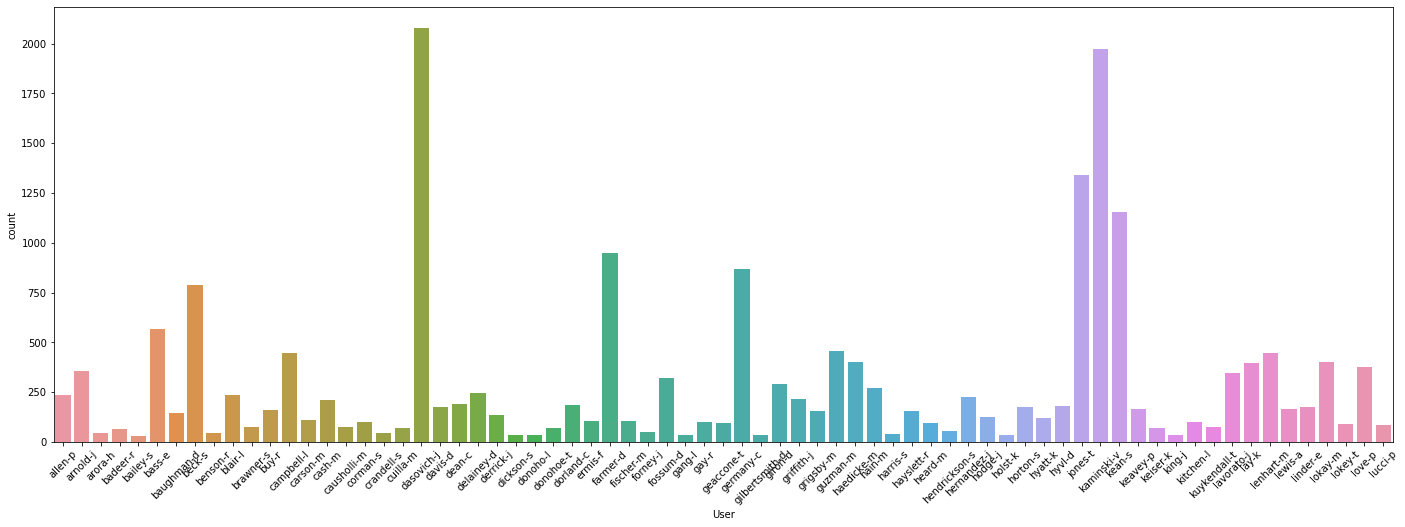

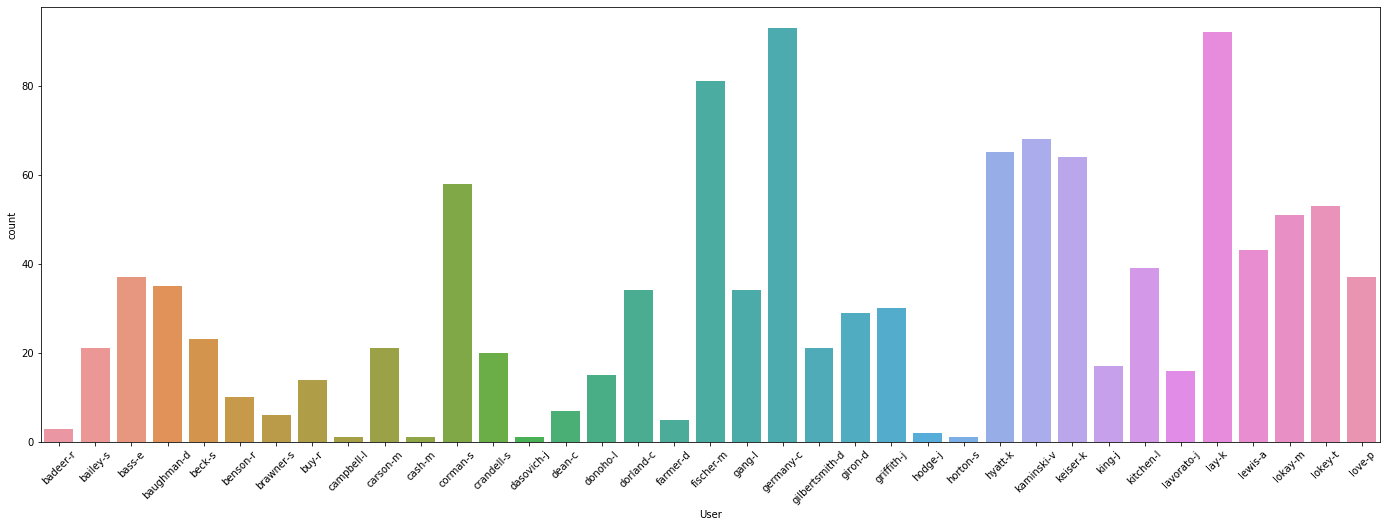

In [16]:
plt.figure(figsize=(24,8))
barUsers = sns.countplot(x='User', data=small_df.sort_values("User"))
barUsers = barUsers.set_xticklabels(barUsers.get_xticklabels(), rotation=45)

plt.figure(figsize=(24,8))
barUsers2000 = sns.countplot(x='User', data=small_df[small_df["Year"] == 2002].sort_values("User"))
barUsers2000 = barUsers2000.set_xticklabels(barUsers2000.get_xticklabels(), rotation=45)

**Summary**: So in this section we got to see two things: who is sending/receiving emails from lots of different people, and who sends the most emails!

***User Level***

This is a pretty large dataset, and because of that it's hard to process text for every single user and then append it to the larger dataset. The best way to work with this corpus (without the CRC) is likely to look more on a user by user level.

In [125]:
dasovich = small_df[small_df["User"] == 'dasovich-j']
dasovich

,Date,From,To,Subject,Cc,Bcc,X-From,X-To,X-cc,X-bcc,X-Folder,X-FileName,Text,Folder,User,Month,Day,Year
53556,2001-03-20 23:18:00-08:00,tasker@haas.berkeley.edu,cvavrek@deloitte.com,RE: Group Project--E221,"asama@yahoo.com, mark_guinney@watsonwyatt.com,...","asama@yahoo.com, mark_guinney@watsonwyatt.com,...",Sarah Tasker <tasker@haas.berkeley.edu>,"""Vavrek, Carolyn (US - San Francisco)"" <cvavre...","Anil Sama <asama@yahoo.com>, Mark Guinney <Mar...",,\Jeff_Dasovich_June2001\Notes Folders\All docu...,jdasovic.nsf,"Hi Carolyn, Anil, Mark & Jeff - I'm really sor...",all_documents,dasovich-j,3,20,2001
59481,2001-07-09 09:33:00-07:00,susan.mara@enron.com,jeff.dasovich@enron.com,July 12th Gas Issues Conference Call Agenda,1.0,Jeff Dasovich,,,\Jeff_Dasovich_Oct2001\Notes Folders\All docum...,DASOVICH-J,jdasovic.nsf,None,you might want to join this\n\nSue Mara\nEnron...,all_documents,dasovich-j,7,9,2001
76553,2001-07-11 05:15:00-07:00,jeff.dasovich@enron.com,richard.shapiro@enron.com,Hearing hasn;t started yet,1.0,Richard Shapiro,,,\Jeff_Dasovich_Oct2001\Notes Folders\Sent,DASOVICH-J,jdasovic.nsf,None,----- Forwarded by Jeff Dasovich/NA/Enron on 0...,sent,dasovich-j,7,11,2001
68873,2000-10-20 04:54:00-07:00,refertofriend@reply.yahoo.com,jdasovic@enron.com,Yahoo! Finance Story - Yahoo - SDG&amp;E files...,1.0,jdasovic@enron.com,,,\Jeff_Dasovich_Dec2000\Notes Folders\Notes inbox,DASOVICH-J,jdasovic.nsf,None,Douglas L. Dyer (ldyer@enron.com) has sent yo...,notes_inbox,dasovich-j,10,20,2000
60885,2000-11-10 07:08:00-08:00,rob.gramlich@neg.pge.com,"jeff.dasovich@enron.com, tim.belden@enron.com",RE: Rob's Email,1.0,"""'Jeff.Dasovich@enron.com'"" <Jeff.Dasovich@enr...",,,\Jeff_Dasovich_Dec2000\Notes Folders\All docum...,DASOVICH-J,jdasovic.nsf,None,You got it. Hope things are going well for yo...,all_documents,dasovich-j,11,10,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59232,2001-07-01 14:12:00-07:00,enron.announcements@enron.com,eprocurement.list@enron.com,eProcurement is Here!,"erin.abdelnour@enron.com, shelley.robbins@enro...","erin.abdelnour@enron.com, shelley.robbins@enro...",Enron Announcements,eProcurement CORP Users List,"Erin Abdelnour, Shelley Robbins, Angela Robert...",,\Jeff_Dasovich_Oct2001\Notes Folders\All docum...,jdasovic.nsf,eProcurement\n\nI am pleased to announce the l...,all_documents,dasovich-j,7,1,2001
76549,2001-07-11 04:55:00-07:00,jeff.dasovich@enron.com,michael.tribolet@enron.com,FINAL,1.0,Michael Tribolet,,,\Jeff_Dasovich_Oct2001\Notes Folders\Sent,DASOVICH-J,jdasovic.nsf,None,----- Forwarded by Jeff Dasovich/NA/Enron on 0...,sent,dasovich-j,7,11,2001
69566,2001-07-10 02:37:00-07:00,sgovenar@govadv.com,jeff.dasovich@enron.com,RE: Legislation Schedule,1.0,<Jeff.Dasovich@enron.com>,,,\Jeff_Dasovich_Oct2001\Notes Folders\Notes inbox,DASOVICH-J,jdasovic.nsf,None,"Jeff,\n\nThey are working on amendments for SB...",notes_inbox,dasovich-j,7,10,2001
80130,2001-09-19 15:04:18-07:00,jeff.dasovich@enron.com,ginger.dernehl@enron.com,,1.0,"Dernehl, Ginger </O=ENRON/OU=NA/CN=RECIPIENTS/...",,,"\Dasovich, Jeff (Non-Privileged)\Dasovich, Jef...",DASOVICH-J,"Dasovich, Jeff (Non-Privileged).pst",None,thanks so much. please call me at office. bes...,sent_items,dasovich-j,9,19,2001


***Surveying Text***

***Wordclouds***